In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Timeseries forecasting and fault detection  in PT100 temperature sensor.

To perform time series analysis and detect faults in a PT100 temperature sensor dataset, you can follow these steps:

**Preprocess the data**:
- Check for missing values and handle them appropriately (e.g., interpolation, imputation).
- Remove any outliers or erroneous data points.
- Ensure the data is in the correct format (e.g., timestamps, temperature values).

**Visualize the data**:
- Plot the temperature values over time to identify any abnormal patterns or trends.
- Use techniques like line plots, scatter plots, or heatmaps to explore the data.

**Analyze the time series characteristics**:
- Check for stationarity using tests like Augmented Dickey-Fuller (ADF) test.
- Identify any seasonality or trends in the data.
- Calculate descriptive statistics like mean, median, standard deviation, and correlation.

**Build a fault detection model**:
- Choose an appropriate fault detection technique based on the characteristics of your data (e.g., statistical methods, machine learning models).
- Train the model using historical data without faults.
- Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

**Apply the fault detection model to new data**:
- Use the trained model to predict if new temperature sensor readings are normal or faulty.
- Identify any deviations from the expected behavior as potential faults.

**Validate and refine the fault detection process**:
- Verify the detected faults with domain experts or additional data sources.
- Continuously monitor the performance of the fault detection model and refine it as needed.

By following these steps and leveraging the provided datasets, you can effectively perform time series analysis and detect faults in PT100 temperature sensor data.

### models we will use:
- ARIMA
- SARIMA
- LSTM
- XGBoost

### EDA:
- Check for missing values
- Check for outliers
- Check for seasonality
- Check for trends
- Check for stationarity
- Check for correlation

### Preprocessing:
- Handle missing values

### Feature Engineering:
- Extract features from timestamps


In [ ]:
# Load the data
df = pd.read_excel("..\datasets\intermittent_fault.xlsx")

# lets convet this xlsx file to csv file
df.to_csv("..\datasets\intermittent_fault.csv", index=False)

In [ ]:
df = pd.read_csv("..\datasets\intermittent_fault.csv")

In [ ]:
df

,2016-05-25 21:15:39,31.81
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [ ]:
# prepare the data
df.isna().sum()

2016-05-25 21:15:39    0
31.81                  0
dtype: int64

In [ ]:
# no null values

# lets check the data types
df.dtypes

df.columns = ["date","value"]
df

,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [ ]:
df["date"] = pd.to_datetime(df["date"])


In [ ]:
df.dtypes   

date     datetime64[ns]
value           float64
dtype: object

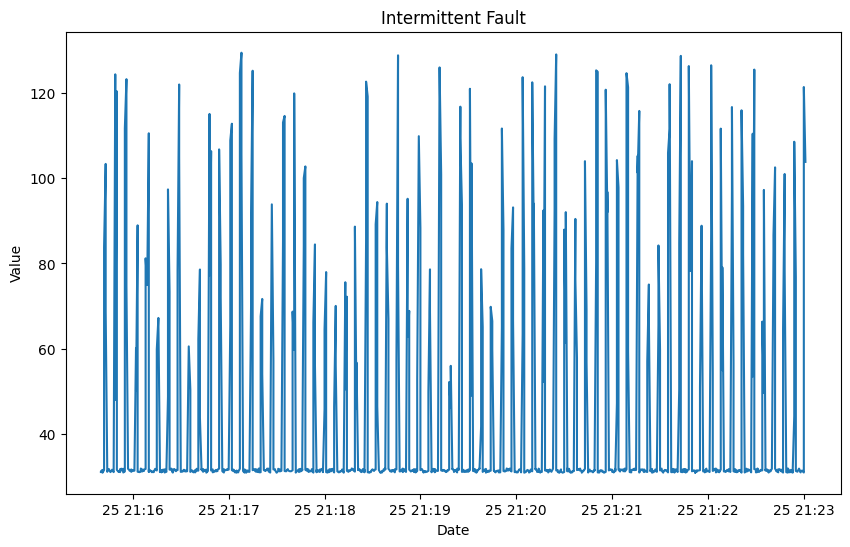

In [9]:
# EDA
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["value"])
plt.title("Intermittent Fault")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


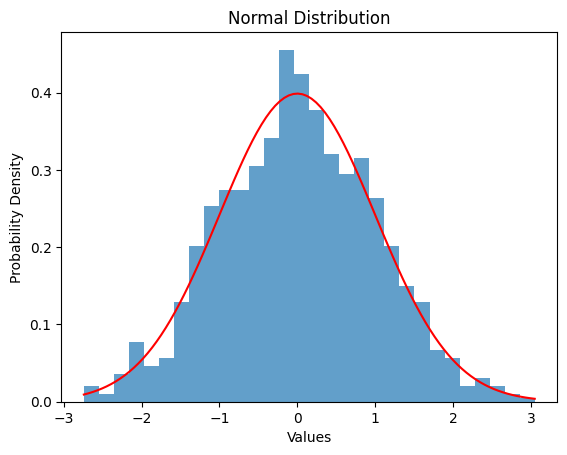

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Set the mean and standard deviation
mean = 0
std_dev = 1

# Generate random numbers from a normal distribution
data = np.random.normal(mean, std_dev, 1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.7)

# Plot the probability density function
x = np.linspace(min(data), max(data), 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, y, color='red')

# Set the plot labels and title
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()

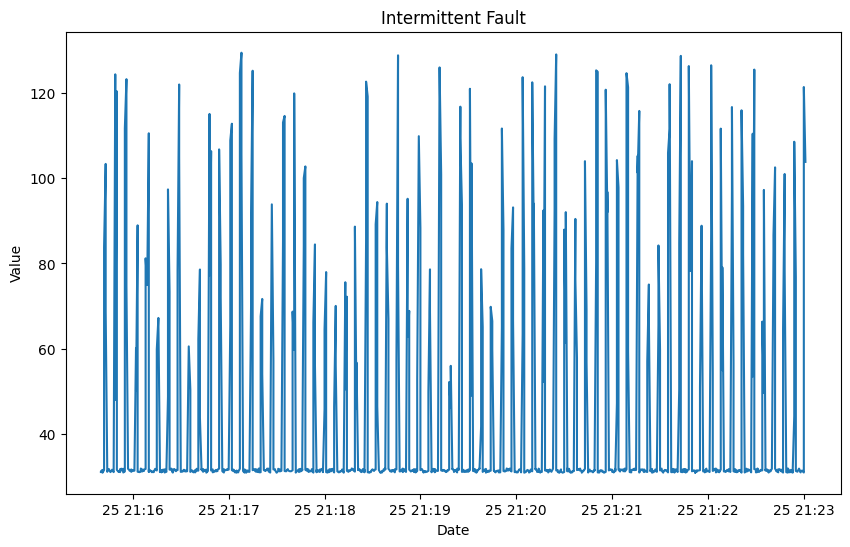

In [15]:
# line plot
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["value"])
plt.title("Intermittent Fault")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


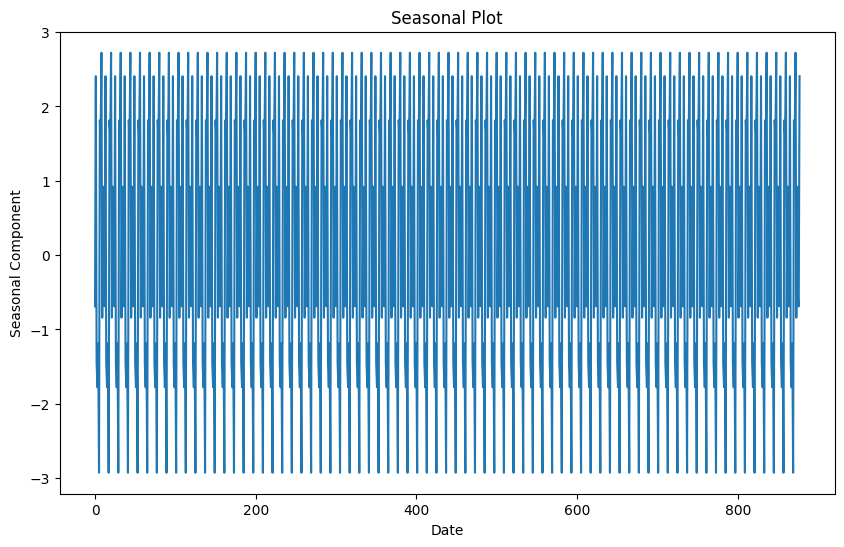

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['value'], model='additive', period=12)

# Plot the seasonal component
result.seasonal.plot(figsize=(10, 6))
plt.title('Seasonal Plot')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()

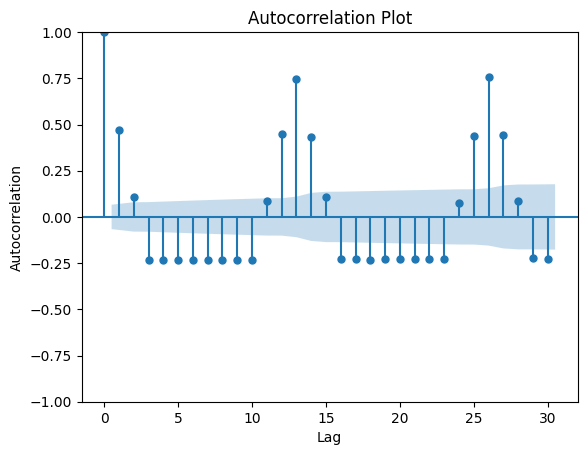

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation
plot_acf(df['value'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

In [50]:
df= pd.read_csv("..\datasets\intermittent_fault.csv")
df.columns = ["date","value"]

df


,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [54]:
# Forecast the next 10 values




from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df, order=(5, 1, 0))
model_fit = model.fit()

# Get the summary of the model
model_fit.summary()


q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  878
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4033.677
Date:                Sat, 11 May 2024   AIC                           8079.353
Time:                        21:46:37   BIC                           8108.012
Sample:                             0   HQIC                          8090.315
                                - 878                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2311      0.031     -7.421      0.000      -0.292      -0.170
ar.L2         -0.1404      0.032     -4.421      0.000      -0.203      -0.078
ar.L3         -0.3751      0.028    -13.340      0.000      -0.430      -0.320
ar.L4         -0.1479      0.066     -2.245      0.025      -0.277      -0.019
ar.L5         -0.0757      0.073     -1.039      0.299      -0.218       0.067
sigma2       578.6379     17.075     33.889      0.000     545.172     612.103
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               666.56
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             1.18
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
forecast = model_fit.forecast(steps=10)
forecast

q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


878    95.293407
879    65.922147
880    67.159122
881    69.940535
882    82.720613
883    83.897838
884    82.826554
885    77.609624
886    76.423149
887    76.690900
Name: predicted_mean, dtype: float64

In [76]:
df = pd.read_csv("..\datasets\intermittent_fault.csv")
df.columns = ["date","value"]

In [77]:
df.head()



,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63


In [78]:
df.head(10)

,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
5,2016-05-25 21:15:42,83.79
6,2016-05-25 21:15:43,103.29
7,2016-05-25 21:15:43,68.79
8,2016-05-25 21:15:44,31.22
9,2016-05-25 21:15:44,31.40


In [82]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'].dt.strftime('%H:%M:%S'), inplace=True)
df.drop('date', axis=1, inplace=True)


In [86]:
df.info()
model_df = df["value"]


<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 21:15:40 to 21:23:01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   878 non-null    float64
dtypes: float64(1)
memory usage: 13.7+ KB


date
21:15:40     31.17
21:15:40     31.32
21:15:41     31.66
21:15:41     31.00
21:15:42     31.63
             ...  
21:22:59     31.44
21:22:59     31.49
21:23:00     31.05
21:23:00    121.29
21:23:01    103.76
Name: value, Length: 878, dtype: float64

In [89]:
from statsmodels.tsa.arima.model import ARIMA

# train test split
train = model_df[:len

# Fit the ARIMA model
model = ARIMA(model_df, order=(5, 1, 0))
model_fit = model.fit()

# Get the summary of the model
model_fit.summary()



q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  878
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4033.677
Date:                Sat, 11 May 2024   AIC                           8079.353
Time:                        22:03:40   BIC                           8108.012
Sample:                             0   HQIC                          8090.315
                                - 878                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2311      0.031     -7.421      0.000      -0.292      -0.170
ar.L2         -0.1404      0.032     -4.421      0.000      -0.203      -0.078
ar.L3         -0.3751      0.028    -13.340      0.000      -0.430      -0.320
ar.L4         -0.1479      0.066     -2.245      0.025      -0.277      -0.019
ar.L5         -0.0757      0.073     -1.039      0.299      -0.218       0.067
sigma2       578.6379     17.075     33.889      0.000     545.172     612.103
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               666.56
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             1.18
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
# Forecast the next 10 values
forecast = model_fit.forecast(steps=10)
forecast


q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


878    95.293407
879    65.922147
880    67.159122
881    69.940535
882    82.720613
883    83.897838
884    82.826554
885    77.609624
886    76.423149
887    76.690900
Name: predicted_mean, dtype: float64